## Using HHM for predicting postures

In [1]:
import numpy as np
from hmmlearn.hmm import GaussianHMM
from itertools import permutations
from scipy.linalg import norm
from hmmlearn import hmm
import math
from datetime import datetime
from numpy import genfromtxt
from sklearn import preprocessing
import hmm_rand_observations_analysis as smp

input_raw = genfromtxt('../docs/A01.txt', delimiter=',',dtype='str')
input = input_raw[np.where(input_raw[:,1]=='020-000-033-111')]
input = input[:,(2,4,5,6,7)]
walk=np.where(input[:,4]=='walking')[0]
sit=np.where(input[:,4]=='sitting')[0]
lay=np.where(input[:,4]=='lying')[0]
attr=walk.tolist()
attr.extend(sit.tolist())
attr.extend(lay.tolist())
input=input[attr]


## Encoding the postures to numerical values

In [2]:
encoding = preprocessing.LabelEncoder()  
input[:, 4] = encoding.fit_transform(input[:, 4])
mapping=[]
for i in sorted(set(input[:,4].astype(float))):
    mapping.append((int(i),encoding.inverse_transform(int(i))),)
input = sorted(input, key = lambda a_entry: a_entry[0]) 
input = np.array(input)
input = input[:,(1,2,3,4)]
input = input.astype(float)
mapping

[(0, 'lying'), (1, 'sitting'), (2, 'walking')]

## Splitting data into training and testing

In [3]:
train_rows = int(math.floor(0.7* input.shape[0]))
test_rows = input.shape[0] - train_rows
    
# separate out training and testing data
trainX = input[:train_rows,:-1]
trainZ = input[:train_rows,-1]
trainZ=trainZ.astype(int)
testX = input[train_rows:,:-1]
testZ = input[train_rows:,-1]
testZ=testZ.astype(int)

print "Total    ",input.shape
print "Training ",trainX.shape," Label ",trainZ.shape
print "Testing  ",testX.shape,"  Label ",testZ.shape,"\n"
print input[:3,:]

Total     (1145, 4)
Training  (801, 3)  Label  (801,)
Testing   (344, 3)   Label  (344,) 

[[ 4.29195356  1.78114045  1.3444953   2.        ]
 [ 4.36407709  1.76769149  1.29999638  2.        ]
 [ 4.24491358  1.98168194  1.30875885  2.        ]]


## Gaussian distribution over the 11 latent variables 

In [4]:
model_p = GaussianHMM(3,'diag').fit(trainX)
hidden_states = model_p.predict(trainX)
l = list(permutations(range(0,3)))
acctrain_chest=-1
cur_acc=0

## Transition probability from the 11 states 

In [5]:
print model_p.transmat_

[[  9.92480300e-01   7.51970044e-03   2.35856246e-25]
 [  5.03840068e-03   9.87404914e-01   7.55668511e-03]
 [  1.01740559e-49   2.18977706e-02   9.78102229e-01]]


## Mean of observations for each Gaussian curve

In [6]:
print model_p.means_

[[ 4.64163492  1.27083409  0.19847146]
 [ 2.96600368  1.88208687  1.05933009]
 [ 0.96527779  2.41230658  0.46999486]]


## Covariance of observations for each Gaussian curve 

In [7]:
print model_p.covars_

[[[ 0.05956445  0.          0.        ]
  [ 0.          0.07085106  0.        ]
  [ 0.          0.          0.09663173]]

 [[ 0.23924751  0.          0.        ]
  [ 0.          0.27811604  0.        ]
  [ 0.          0.          0.01985863]]

 [[ 0.03143183  0.          0.        ]
  [ 0.          0.04350469  0.        ]
  [ 0.          0.          0.14288004]]]


## Starting probability

In [8]:
print model_p.startprob_

[  1.48118262e-017   1.00000000e+000   1.98879417e-250]


## Training Accuracy

In [9]:
for p in l:
    var_trainZ=trainZ
    for i in range(trainZ.shape[0]):
        var_trainZ[i]=p[trainZ[i]]
    cur_acc=np.mean( hidden_states == var_trainZ )
    if(cur_acc>acctrain_chest):
        acctrain_chest=cur_acc
        perm_m=p
print acctrain_chest

0.624219725343


## Testing Accuracy

In [10]:
predZ = model_p.predict(testX)
var_testZ=testZ
for i in range(testZ.shape[0]):
    var_testZ[i]=perm_m[testZ[i]]
acctest_chest = np.mean(predZ == var_testZ)
print acctest_chest

0.168604651163


## Modelling for Left Ankle 010-000-024-033

In [11]:
input = input_raw[np.where(input_raw[:,1]=='010-000-024-033')]
input = input[:,(2,4,5,6,7)]
walk=np.where(input[:,4]=='walking')[0]
sit=np.where(input[:,4]=='sitting')[0]
lay=np.where(input[:,4]=='lying')[0]
attr=walk.tolist()
attr.extend(sit.tolist())
attr.extend(lay.tolist())
input=input[attr]
encoding = preprocessing.LabelEncoder()  
input[:, 4] = encoding.fit_transform(input[:, 4])
mapping=[]
for i in sorted(set(input[:,4].astype(float))):
    mapping.append((int(i),encoding.inverse_transform(int(i))),)
input = sorted(input, key = lambda a_entry: a_entry[0]) 
input = np.array(input)
input = input[:,(1,2,3,4)]
input = input.astype(float)
train_rows = int(math.floor(0.7* input.shape[0]))
test_rows = input.shape[0] - train_rows    
# separate out training and testing data
trainX = input[:train_rows,:-1]
trainZ = input[:train_rows,-1]
trainZ = trainZ.astype(int)
testX = input[train_rows:,:-1]
testZ = input[train_rows:,-1]
testZ = testZ.astype(int)
model_p = GaussianHMM(3,'diag').fit(trainX)
hidden_states = model_p.predict(trainX)
l = list(permutations(range(0,3)))
acctrain_left_ankle = -1
cur_acc = 0
for p in l:
    var_trainZ=trainZ
    for i in range(trainZ.shape[0]):
        var_trainZ[i] = p[trainZ[i]]
    cur_acc=np.mean( hidden_states == var_trainZ )
    if(cur_acc > acctrain_left_ankle):
        acctrain_left_ankle = cur_acc
        perm_m = p
predZ = model_p.predict(testX)
var_testZ = testZ
for i in range(testZ.shape[0]):
    var_testZ[i] = perm_m[testZ[i]]
acctest_left_ankle = np.mean(predZ == var_testZ)

## Modelling for right ankle 010-000-030-096

In [12]:
input = input_raw[np.where(input_raw[:,1]=='010-000-030-096')]
input = input[:,(2,4,5,6,7)]
walk = np.where(input[:,4]=='walking')[0]
sit = np.where(input[:,4]=='sitting')[0]
lay = np.where(input[:,4]=='lying')[0]
attr = walk.tolist()
attr.extend(sit.tolist())
attr.extend(lay.tolist())
input = input[attr]
encoding = preprocessing.LabelEncoder()  
input[:, 4] = encoding.fit_transform(input[:, 4])
mapping=[]
for i in sorted(set(input[:,4].astype(float))):
    mapping.append((int(i),encoding.inverse_transform(int(i))),)
input = sorted(input, key = lambda a_entry: a_entry[0]) 
input = np.array(input)
input = input[:,(1,2,3,4)]
input = input.astype(float)
train_rows = int(math.floor(0.7* input.shape[0]))
test_rows = input.shape[0] - train_rows    
# separate out training and testing data
trainX = input[:train_rows,:-1]
trainZ = input[:train_rows,-1]
trainZ=trainZ.astype(int)
testX = input[train_rows:,:-1]
testZ = input[train_rows:,-1]
testZ=testZ.astype(int)
model_p = GaussianHMM(3,'diag').fit(trainX)
hidden_states = model_p.predict(trainX)
l = list(permutations(range(0,3)))
acctrain_right_ankle=-1
cur_acc=0
for p in l:
    var_trainZ=trainZ
    for i in range(trainZ.shape[0]):
        var_trainZ[i]=p[trainZ[i]]
    cur_acc=np.mean( hidden_states == var_trainZ )
    if(cur_acc > acctrain_right_ankle):
        acctrain_right_ankle = cur_acc
        perm_m=p
predZ = model_p.predict(testX)
var_testZ = testZ
for i in range(testZ.shape[0]):
    var_testZ[i]=perm_m[testZ[i]]
acctest_right_ankle = np.mean(predZ == var_testZ)

## Modelling for Belt 020-000-032-221

In [13]:
input = input_raw[np.where(input_raw[:,1]=='010-000-024-033')]
input = input[:,(2,4,5,6,7)]
walk=np.where(input[:,4]=='walking')[0]
sit=np.where(input[:,4]=='sitting')[0]
lay=np.where(input[:,4]=='lying')[0]
attr=walk.tolist()
attr.extend(sit.tolist())
attr.extend(lay.tolist())
input=input[attr]
encoding = preprocessing.LabelEncoder()  
input[:, 4] = encoding.fit_transform(input[:, 4])
mapping=[]
for i in sorted(set(input[:,4].astype(float))):
    mapping.append((int(i),encoding.inverse_transform(int(i))),)
input = sorted(input, key = lambda a_entry: a_entry[0]) 
input = np.array(input)
input = input[:,(1,2,3,4)]
input = input.astype(float)
train_rows = int(math.floor(0.7* input.shape[0]))
test_rows = input.shape[0] - train_rows    
# separate out training and testing data
trainX = input[:train_rows,:-1]
trainZ = input[:train_rows,-1]
trainZ = trainZ.astype(int)
testX = input[train_rows:,:-1]
testZ = input[train_rows:,-1]
testZ = testZ.astype(int)
model_p = GaussianHMM(3,'diag').fit(trainX)
hidden_states = model_p.predict(trainX)
l = list(permutations(range(0,3)))
acctrain_belt = -1
cur_acc = 0
for p in l:
    var_trainZ=trainZ
    for i in range(trainZ.shape[0]):
        var_trainZ[i] = p[trainZ[i]]
    cur_acc=np.mean( hidden_states == var_trainZ )
    if(cur_acc > acctrain_belt):
        acctrain_belt = cur_acc
        perm_m = p
predZ = model_p.predict(testX)
var_testZ = testZ
for i in range(testZ.shape[0]):
    var_testZ[i] = perm_m[testZ[i]]
acctest_belt = np.mean(predZ == var_testZ)

## Modelling for all tags

In [16]:
input = input_raw[:,(2,4,5,6,7)]
walk=np.where(input[:,4]=='walking')[0]
sit=np.where(input[:,4]=='sitting')[0]
lay=np.where(input[:,4]=='lying')[0]
attr=walk.tolist()
attr.extend(sit.tolist())
attr.extend(lay.tolist())
input=input[attr]
encoding = preprocessing.LabelEncoder()  
input[:, 4] = encoding.fit_transform(input[:, 4])
mapping=[]
for i in sorted(set(input[:,4].astype(float))):
    mapping.append((int(i),encoding.inverse_transform(int(i))),)
input = sorted(input, key = lambda a_entry: a_entry[0]) 
input = np.array(input)
input = input[:,(1,2,3,4)]
input = input.astype(float)
train_rows = int(math.floor(0.7* input.shape[0]))
test_rows = input.shape[0] - train_rows    
# separate out training and testing data
trainX = input[:train_rows,:-1]
trainZ = input[:train_rows,-1]
trainZ = trainZ.astype(int)
testX = input[train_rows:,:-1]
testZ = input[train_rows:,-1]
testZ = testZ.astype(int)
model_p = GaussianHMM(3,'diag').fit(trainX)
hidden_states = model_p.predict(trainX)
l = list(permutations(range(0,3)))
acctrain = -1
cur_acc = 0
for p in l:
    var_trainZ=trainZ
    for i in range(trainZ.shape[0]):
        var_trainZ[i] = p[trainZ[i]]
    cur_acc=np.mean( hidden_states == var_trainZ )
    if(cur_acc > acctrain):
        acctrain = cur_acc
        perm_m = p
predZ = model_p.predict(testX)
var_testZ = testZ
for i in range(testZ.shape[0]):
    var_testZ[i] = perm_m[testZ[i]]
acctest = np.mean(predZ == var_testZ)

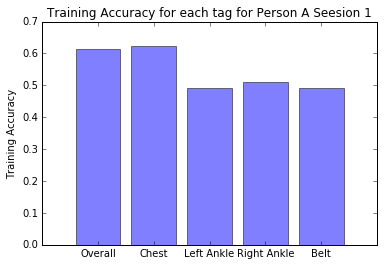

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
objects = ('Overall','Chest', 'Left Ankle', 'Right Ankle', 'Belt')
y_pos = np.arange(len(objects))
performance = [acctrain, acctrain_chest, acctrain_left_ankle, acctrain_right_ankle, acctrain_belt]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for each tag for Person A Seesion 1')
 
plt.show()

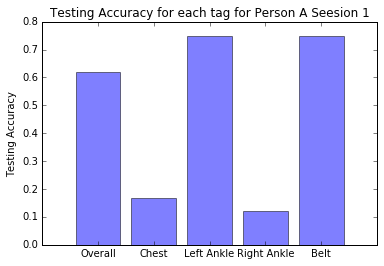

In [18]:
objects = ('Overall','Chest', 'Left Ankle', 'Right Ankle', 'Belt')
y_pos = np.arange(len(objects))
performance = [acctest, acctest_chest, acctest_left_ankle, acctest_right_ankle, acctest_belt]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for each tag for Person A Seesion 1')
 
plt.show()